In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
!pip install prince

<IPython.core.display.Javascript object>

# Dimensionality Reduction: MCA & FAMD Assignment

In [3]:
import prince
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the HR data set 

In [4]:
filepath = "C:/Users/jlim7/OneDrive/Documents/GitHub/Thinkful_work/Thinkful/Data/hr_dataset.csv"
hr = pd.read_csv(filepath)
hr.head()

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


<IPython.core.display.Javascript object>

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [5]:
hr.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                    int64
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

<IPython.core.display.Javascript object>

In [6]:
hr["Zip"] = hr["Zip"].astype(str)

<IPython.core.display.Javascript object>

In [7]:
hr.dtypes

Age                    int64
Pay Rate             float64
State                 object
Zip                   object
Sex                   object
MaritalDesc           object
CitizenDesc           object
Hispanic/Latino       object
RaceDesc              object
Days Employed          int64
Reason For Term       object
Employment Status     object
Department            object
Position              object
Manager Name          object
Employee Source       object
Performance Score     object
dtype: object

<IPython.core.display.Javascript object>

### Pull out the categorical variables and note the dimensions of the data set.

In [8]:
cat_df = hr.select_dtypes("O")

<IPython.core.display.Javascript object>

### Reduce these categorical features down to two dimensions using MCA.

In [9]:
# zip code dominates the plot remove this to hopefully see more information
mca_df = cat_df.drop(columns=["Zip"])

<IPython.core.display.Javascript object>

In [10]:
mca = prince.MCA(2)
mca.fit(cat_df)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension.

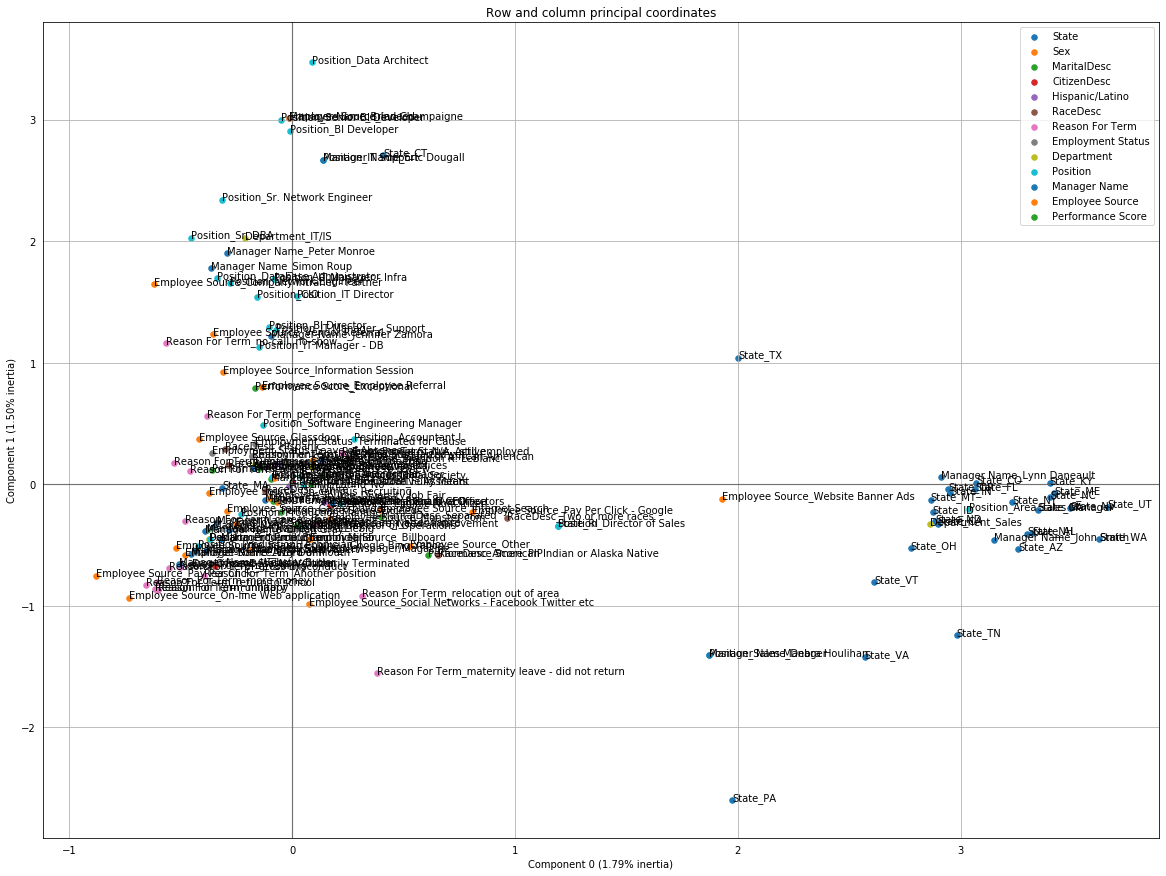

<IPython.core.display.Javascript object>

In [11]:
mca.plot_coordinates(
    mca_df,
    show_row_points=False,
    figsize=(20, 15),
    show_column_labels=True,
    show_column_points=True,
)
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [12]:
cat_df.shape

(310, 14)

<IPython.core.display.Javascript object>

In [13]:
dummy_df = pd.get_dummies(mca_df)
dummy_df.shape

(310, 155)

<IPython.core.display.Javascript object>

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [14]:
ca = prince.CA(2)
ca.fit(dummy_df)

CA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
   n_iter=10, random_state=None)

<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension.

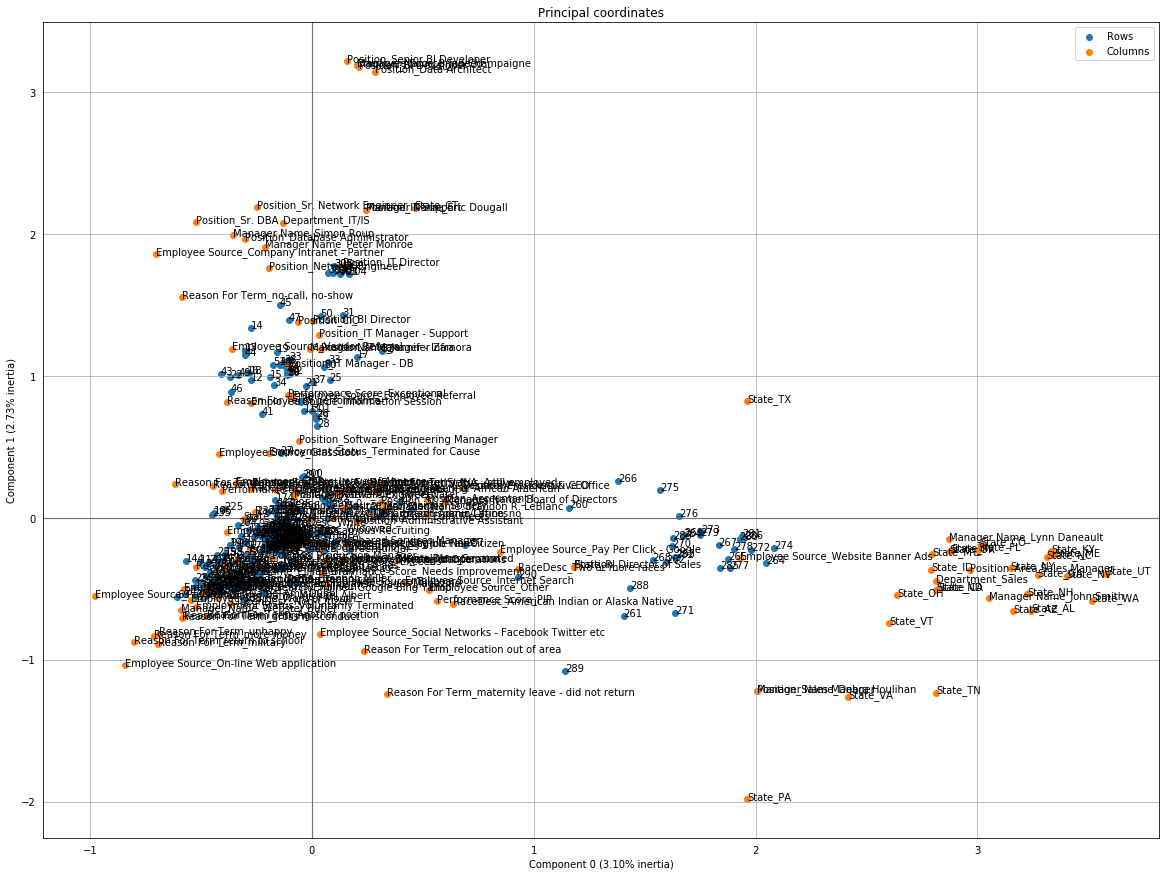

<IPython.core.display.Javascript object>

In [16]:
ca.plot_coordinates(
    dummy_df, figsize=(20, 15),
)
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

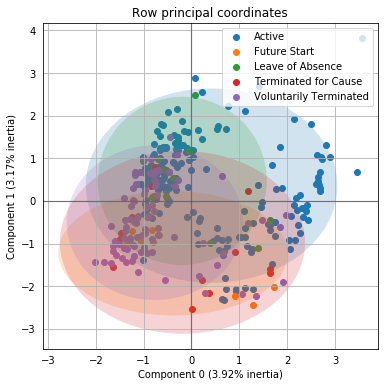

<IPython.core.display.Javascript object>

In [18]:
famd = prince.FAMD()
famd.fit(hr)

famd.plot_row_coordinates(hr, color_labels=hr["Employment Status"])
plt.show()

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.